In [ ]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [ ]:
def default_pars( **kwargs):
    pars = {}
    
    ### typical neuron parameters###
    pars['V_th']    = -55. # spike threshold [mV]
    pars['V_reset'] = -75. #reset potential [mV]
    pars['tau_m']   = 10. # membrane time constant [ms]
    pars['g_L']     = 10. #leak conductance [nS]
    pars['V_init']  = -65. # initial potential [mV]
    pars['V_L']     = -75. #leak reversal potential [mV]
    pars['tref']    = 2. # refractory time (ms)

    ### simulation parameters ###
    pars['T'] = 1000. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]
    
    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars

In [ ]:
def run_LIF(pars, I):
    
    # Set parameters
    V_th, V_reset = pars['V_th'], pars['V_reset']   
    tau_m, g_L = pars['tau_m'], pars['g_L']        
    V_init, V_L = pars['V_init'], pars['V_L']       
    dt, range_t = pars['dt'], pars['range_t'] 
    Lt = range_t.size 
    tref = pars['tref']
    # Initialize voltage and current 
    v = np.zeros(Lt)
    v[0] = V_init
    I = I * np.ones(Lt) #I doesn't change with time 
    tr = 0.
    # simulate the LIF dynamics 
    rec_spikes = []               # record spike times
    for it in range(Lt-1):
      if tr >0:
            v[it] = V_reset
            tr = tr-1
      elif v[it] >= V_th:         #reset voltage and record spike event
            rec_spikes.append(it)
            v[it] = V_reset
            tr = tref/dt
      #calculate the increment of the membrane potential
      #dv = ((v[it]-V_L)**2 + I[it]/g_L) * (dt/tau_m) #exp and quad models capture the curviness of the spike 
      dv = (-(v[it]-V_L) + np.exp(v[it] - (V_L + 10)) + I[it]/g_L) * (dt/tau_m) #added 10 bec needs to be greater than threshold
        
      #update the membrane potential
      v[it+1] = v[it] + dv
        
    rec_spikes = np.array(rec_spikes) * dt
        
    return v, rec_spikes

%s [ 56.1 202.2 348.3 494.4 640.5 786.6 932.7]


Text(0, 0.5, 'Voltage (mV)')

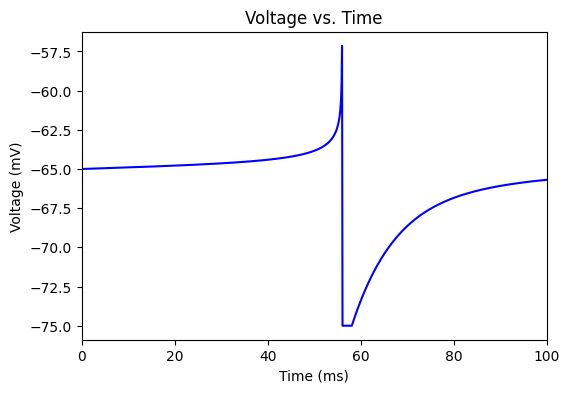

In [ ]:
pars = default_pars()
v, rec_spikes = run_LIF(pars, I = 91)
print('%s',(rec_spikes)) #for observing the spikes more closely + observing the refractory period
plt.plot(pars['range_t'], v, 'b')
plt.xlim(0, 100)
plt.title('Voltage vs. Time')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

In [ ]:
def default_pars( **kwargs):
    pars = {}
    
    ### typical neuron parameters###
    pars['V_th']    = -55. # spike threshold [mV]
    pars['V_reset'] = -75. #reset potential [mV]
    pars['tau_m']   = 10. # membrane time constant [ms]
    pars['g_L']     = 10. #leak conductance [nS]
    pars['V_init']  = -65. # initial potential [mV]
    pars['V_L']     = -75. #leak reversal potential [mV]
    pars['tref']    = 2. # refractory time (ms)

    ### simulation parameters ###
    pars['T'] = 1000. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]
    
    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars

In [ ]:
frequencies = []
avg_Rate = []
spike_time = []
iapp = np.arange(0, 20000, 1) # for min, 80 to 100 w 0.1, for max change to 19800 to 20000 
val = []
min_current = 999
pars = default_pars()


for current in iapp:
    
    # Set parameters
    V_th, V_reset = pars['V_th'], pars['V_reset']   
    tau_m, g_L = pars['tau_m'], pars['g_L']        
    V_init, V_L = pars['V_init'], pars['V_L']       
    dt, range_t = pars['dt'], pars['range_t'] 
    Lt = range_t.size 
    tref = pars['tref']
    # Initialize voltage and current 
    v = np.zeros(Lt)
    v[0] = V_init
    I = current * np.ones(Lt) #I doesn't change with time 
    tr = 0.
    # simulate the LIF dynamics 
    rec_spikes = []               # record spike times

    spike_counter = 0
    for it in range(Lt-1):
      if tr >0:
            v[it] = V_reset
            tr = tr-1
      elif v[it] >= V_th:         #reset voltage and record spike event
            rec_spikes.append(it)
            spike_counter = spike_counter + 1
            v[it] = V_reset
            tr = tref/dt
      #calculate the increment of the membrane potential
      #exp and quad models capture the curviness of the spike 
      dv = (-(v[it]-V_L) + np.exp(v[it] - (V_L + 10)) + I[it]/g_L) * (dt/tau_m) #added 10 bec needs to be greater than threshold
      #update the membrane potential
      v[it+1] = v[it] + dv
        
    rec_spikes = np.array(rec_spikes) * dt
    if len(rec_spikes) > 0:
      val.append(current)
  
    #avg_Rate.append(spike_counter)
    frequencies.append(spike_counter)
          
      #v, rec_spikes, min_current 

455
Current for min Frequency 91
Min Frequency 7
Min current 91
Max freq 455


Text(0.5, 0, 'Current (pA)')

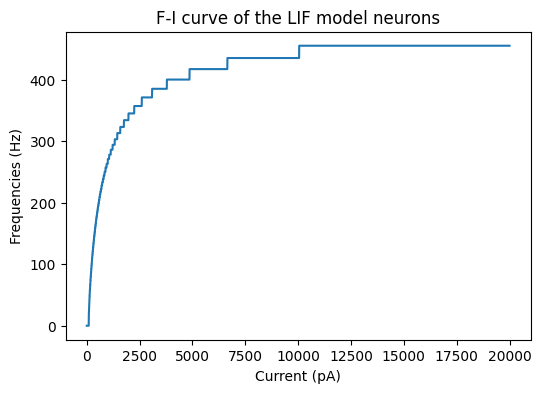

In [ ]:
#print(frequencies)

min_current = min(val)
print(spike_counter)
#print('%s',(rec_spikes)) #for observing the spikes more closely + observing the refractory period
#plt.plot(range_t, v, 'b')
#plt.xlim(0, 100)
#plt.title('Voltage vs. Time')
#plt.xlabel('Time (ms)')
#plt.ylabel('Voltage (mV)')

newfreqs = [x for x in frequencies if x > 0]

indices = [i for i, v in enumerate(frequencies) if v > 0]
Inew = iapp[indices]

print("Current for min Frequency", min(Inew)) #all freqs are in hz
print("Min Frequency", min(newfreqs))
print("Min current", min_current)
print("Max freq",  max(newfreqs))

icurr = np.arange(0, 20000, 1)

plt.plot(icurr,frequencies)
plt.title('F-I curve of the LIF model neurons')
plt.ylabel('Frequencies (Hz)')
plt.xlabel('Current (pA)')

In [ ]:
print(len(range_t))

10000


In [ ]:
def my_GWN(pars, sig, myseed=False):
    
    # Retrieve simulation parameters
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    # set random seed
    if myseed:
        np.random.seed(seed=myseed) 
    else:
        np.random.seed()
        
    #generate GWN
    I =  sig * np.random.randn(Lt) / np.sqrt(dt/1000.)
    
    return I

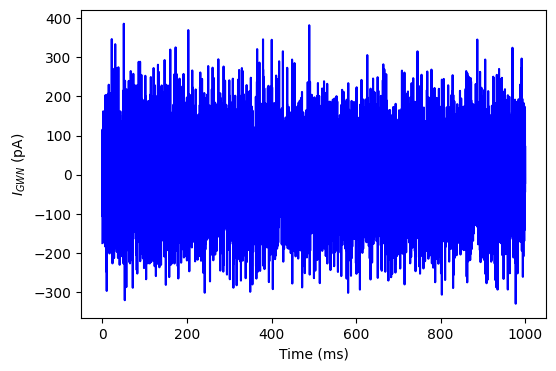

In [ ]:
sig_ou = 1
I_GWN = my_GWN(pars, sig=sig_ou, myseed=100) #this fn introduces noise
plt.plot(pars['range_t'], I_GWN, 'b')
#plt.xlim(0,50) #limit to plt till 50
plt.xlabel('Time (ms)')
plt.ylabel(r'$I_{GWN}$ (pA)');

(100.0, 200.0)

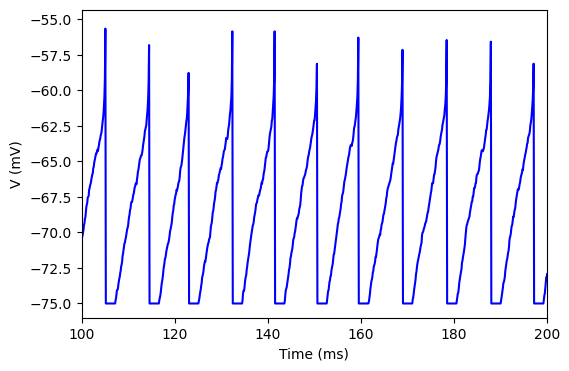

In [ ]:
v, rec_spikes = run_LIF(pars, I =I_GWN+250.) #250 is the reference current 
plt.plot(pars['range_t'], v, 'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(100,200)

In [ ]:
I_mean = np.arange(100.,500.,25)
I_std = np.arange(0.,100.,10)
spk_count = np.zeros((len(I_mean),len(I_std)))
cv_isi = np.empty((len(I_mean),len(I_std)))
cv_isi[:] = np.NaN

for ii in range(len(I_mean)):
  for jj in range(len(I_std)):
    I_GWN = my_GWN(pars, sig=I_std[jj], myseed=1998)
    v, rec_spikes = run_LIF(pars, I =I_GWN+I_mean[ii])
    spk_count[ii,jj] = len(rec_spikes)
    if len(rec_spikes)>3:
      isi = np.diff(rec_spikes)
      cv_isi[ii,jj] = np.std(isi)/np.mean(isi)

<Figure size 600x400 with 0 Axes>

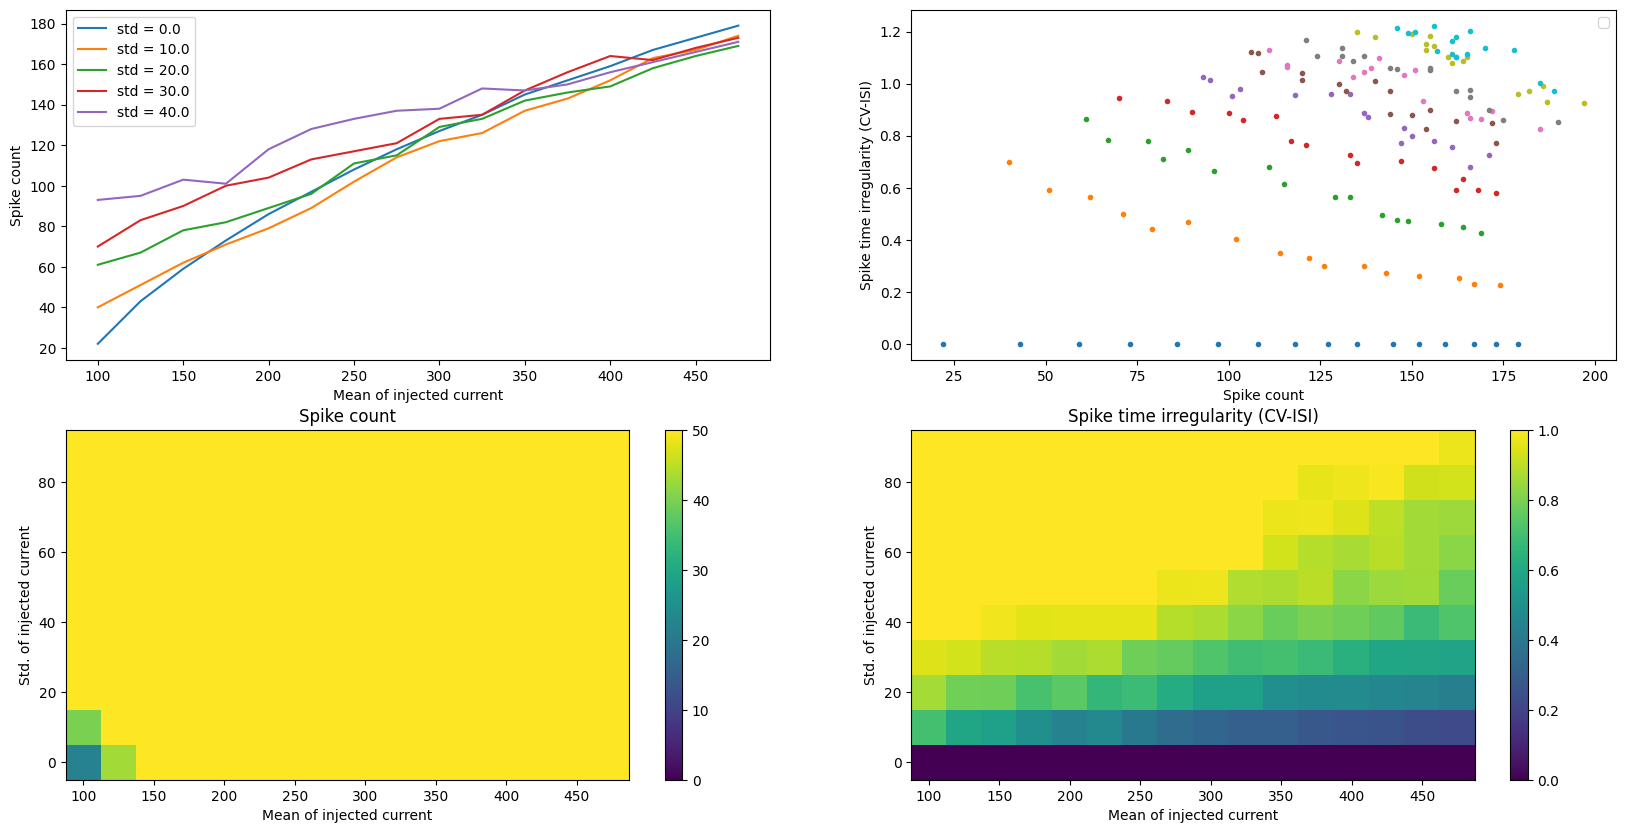

In [ ]:
plt.figure()
plt.figure(figsize=(20, 10))

# Plot the F-I curve i.e. Output firing rate as a function of input mean. Different lines correspond to different std. 
# Note how std changes the F-I curve
plt.subplot(2,2,1)
for ii in range(5):
  plt.plot(I_mean,spk_count[:,ii],label='std = '+str(I_std[ii]))
plt.ylabel('Spike count')
plt.xlabel('Mean of injected current');
plt.legend()

# Plot firing rate vs coeffcient of variance of inter-spike interval
# Do you see any pattern here? 
plt.subplot(2,2,2)
plt.plot(spk_count,cv_isi,'.')
plt.xlabel('Spike count')
plt.ylabel('Spike time irregularity (CV-ISI)');
plt.legend()

# Plot Firing rate as a function of both mean and std. Firing rate is rendered as color
plt.subplot(2,2,3)
plt.pcolor(I_mean,I_std,spk_count.T)
plt.ylabel('Std. of injected current')
plt.xlabel('Mean of injected current');
plt.colorbar()
plt.clim(0,50)
plt.title('Spike count');

# Plot Spike time irregularity (CV_ISI) as a function of both mean and std. CV_isi is rendered as color
plt.subplot(2,2,4)
plt.pcolor(I_mean,I_std,cv_isi.T)
plt.ylabel('Std. of injected current')
plt.xlabel('Mean of injected current');
plt.colorbar()
plt.clim(0,1)
plt.title('Spike time irregularity (CV-ISI)');